**ECS766P DataMining**
**Amrita Tamang (220728829)**
**a.tamang@se22.qmul.ac.uk**

# Association Analysis

## <font color = 'maroon'>Assignment 3 [Part 1 of 2]</font>

Questions 1-6 are pen-and-paper exercises (brief answers and justifications are expected). Questions 7-8 are coding exercises. In all responses, please show your workings (equations, justifications, or code when applicable).

1. What is the advantage of using the Apriori algorithm in comparison with computing the support of every subset of an itemset in order to find the frequent itemsets in a transaction dataset? 

### Answer 1
The Apriori algorithm is an efficient algorithm that scans the database only once. It significantly reduces the size of the itemsets in the database while still delivering good performTo improve the efficiency of the level-wise generation of frequent itemsets, an important property called the Apriori property is used to reduce the search space.

2. Let $\mathcal{L}_1$ denote the set of frequent $1$-itemsets. For $k \geq 2$, why must every frequent $k$-itemset be a superset of an itemset in $\mathcal{L}_1$? 

### Answer 2
Apriori property states that all nonempty subsets of a frequent itemset must also be frequent.

3. Let $\mathcal{L}_2 = \{ \{1,2\}, \{1,4\}, \{2, 3\}, \{2, 4\}, \{3, 5\}\}$. Compute the set of candidates $\mathcal{C}_3$ that is obtained by joining every pair of joinable itemsets from $\mathcal{L}_2$. 


 ### Answer 3
 
$\mathcal{L}_2 = \{ \{1,2\}, \{1,4\}, \{2, 3\}, \{2, 4\}, \{3, 5\}\}$
 
$\mathcal{C}_3 = \{\{1,2,4\},\{2,3,4\}\}$

4. Let $S_1$ denote the support of the association rule $\{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}$. Let $S_2$ denote the support of the association rule $\{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}$. What is the relationship between $S_1$ and $S_2$? 


### Answer 4
$S_1$ = $\{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}$

$S_2$ =$\{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}$

$S_2$ <= $S_1$

5. What is the support of the rule $\{  \} \Rightarrow \{ \text{Eggs} \}$ in the transaction dataset used in Section 1 of this lab notebook? 


### Answer 5
$ S\{  \} \Rightarrow \{ \text{Eggs} \}$

$ S\{  \} \cup\{ \text{Eggs} \}$

$ S\{ \text{Eggs} \}$

$ N \{ \text{Eggs}\} / N $ = 4/5 = 0.8

6. In the transaction dataset used in the tutorial presented above, what is the maximum length of a frequent itemset for a support threshold of 0.2?


### Answer 6
Maximum length of frequent itemset for support threshold of 0.2 = 6

7. Implement a function that computes the Kulczynski measure of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the Kulczynski measure for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Load the dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
#print(te_ary)
df = pd.DataFrame(te_ary, columns=te.columns_)

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.6)
#display(frequent_itemsets)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset

from mlxtend.frequent_patterns import association_rules

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [3]:
def kul(frequent_itemsets, A, B):
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    supportAB = support[A.union(B)]
    pAB = supportAB/support[A]
    pBA = supportAB/support[B]
    result = (pAB + pBA)/2    
    return result

A = frozenset(['Onion'])
B = frozenset(['Kidney Beans', 'Eggs'])
freq_itemset = kul(frequent_itemsets, A, B)
print('Kulczynski measure for A and B is:', freq_itemset)

Kulczynski measure for A and B is: 0.875


8. Implement a function that computes the imbalance ratio of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the imbalance ratio for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.

### Answer 8

In [4]:
# implement imbalance ratio 
def ir(frequent_itemsets, A, B):
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    #using the formula for IR
    x = abs(support[A] -support[B])
    y = support[A] + support[B] - support[A.union(B)]
    result = x/y
    return result

A = frozenset(['Onion'])
B = frozenset(['Kidney Beans', 'Eggs'])

imbalance_itemset = ir(frequent_itemsets, A, B)

print('Imbalance ratio for A and B is:', imbalance_itemset) 

Imbalance ratio for A and B is: 0.2500000000000001


# Outlier Detection

## <font color = 'maroon'>Assignment 3 [Part 2 of 2]</font>

For your answers to the assignment, please include include your workings (e.g. equations, code) when this is relevant to the question. Questions 1-2 are pen-and paper exercises. Question 3 can be addressed either on paper or using code. Questions 4-5 are coding exercises.

1. For an application on credit card fraud detection, we are interested in detecting contextual outliers. Suggest 2 possible contextual attributes and 2 possible behavioural attributes that could be used for this application, and explain why each of your suggested attribute should be considered as either contextual or behavioural.

### Answer 1
Detecting the outlier for credit card fraud detection in the contextual outliers:
    
    1. Contextual attributes: age group, postal code
         Age group can be defined as different group of customer in the context of customer groups.
         Location postal code might be a factor determining out lives in terms of transactions
    2. Behavioural attributes: transactions made per year, month or annual total transaction amount
        Number of transactions made by 80 year old is not same as the transactions made by 20 years old. Compared to middle-aged person might have more transactions per month than younger person.

2. Assume that you are provided with the [University of Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from the Week 3 lab, and that you are asked to detect outliers from this dataset. Additional information on the dataset attributes can be found [online](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names). Explain one possible outlier detection method that you could apply for detecting outliers for this particular dataset, explain what is defined as an outlier for your suggested approach given this particular dataset, and justify why would you choose this particular method for outlier detection.

### Answer 2



Performing clustering on the dataset, using 2 clusters (assuming one cluster for the benign tumors, and one for the malignant tumors). So we could use a clustering-based approach for outlier detection. Any data object that does not belong to any of the two clusters is
identified as an outlier

3. The monthly rainfall in the London borough of Tower Hamlets in 2019 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.

In [5]:
import numpy as np

monthly_rainfall = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]

print('Total monthly rainfall',np.sum(monthly_rainfall))
print('Mean monthly rainfall:', np.mean(monthly_rainfall))
print('Standard deviation of  monthly rainfall:', np.std(monthly_rainfall))
print( abs(monthly_rainfall-np.mean(monthly_rainfall))/np.std(monthly_rainfall) )


Total monthly rainfall 270.41999999999996
Mean monthly rainfall: 22.534999999999997
Standard deviation of  monthly rainfall: 6.130045540885756
[0.06443672 0.30097656 0.52446592 0.21288586 0.45758224 3.14597989
 0.16557789 0.93718716 0.19331015 0.01876006 0.70064732 0.20962324]


Assume that the avaerage monthly rainfall follows the normal distribution.
The most deviating value is 3.25  away from the estimated mean.
We know µ ± 3σ region contains 99.7% of the data under the assumption of a normal distribution.
As observed, the SD of rainfall on June is 3.14 which can be stated as an outlier.

# Answer 4

In [6]:
import pandas as pd
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [8]:
N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [9]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01,gamma='auto')
X = delta.values
yhat = ee.fit_predict(X) # Perform fit on input data and returns labels for that input data.


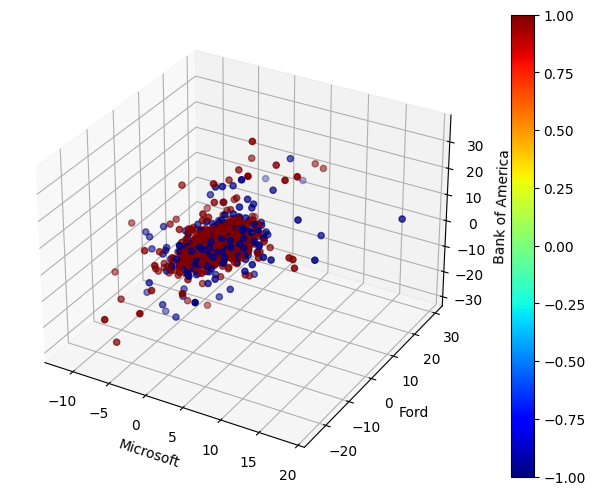

In [11]:
#Plot a 3D scatterplot of the dataset, where each object is color-coded according to whether it is an outlier or an inlier.

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=yhat,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()


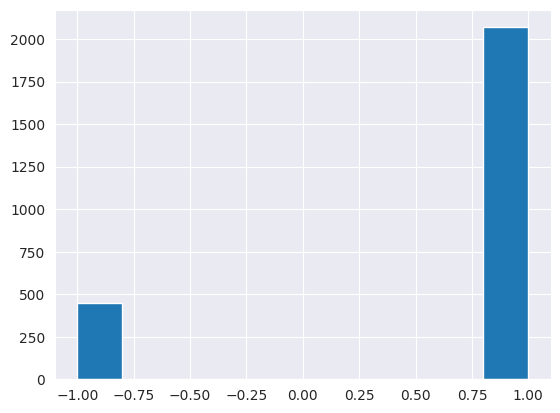

Frequency:
[[  -1    1]
 [ 448 2069]]


In [14]:
#Also compute a histogram and the frequencies of the estimated outlier and inlier labels.
sns.set_style('darkgrid')
#sns.distplot(yhat, bins=None, kde=False)
plt.hist(yhat) 
plt.show()
unique_elements, counts_elements = np.unique(yhat, return_counts=True)
print("Frequency:")
print(np.asarray((unique_elements, counts_elements)))

4. Using the stock prices dataset used in sections 1 and 2 of this lab notebook, estimate the outliers in the dataset using the one-class SVM classifier approach. As input to the classifier, use the percentage of changes in the daily closing price of each stock, as was done in section 1 of the notebook. Use the same SVM settings as in the lab notebook. Plot a 3D scatterplot of the dataset, where each object is color-coded according to whether it is an outlier or an inlier. Also compute a histogram and the frequencies of the estimated outlier and inlier labels. In terms of the plotted results, how does the one-class SVM approach for outlier detection differ from the parametric and proximity-based methods used in the lab notebook? What percentage of the dataset objects are classified as outliers?

(506, 2)


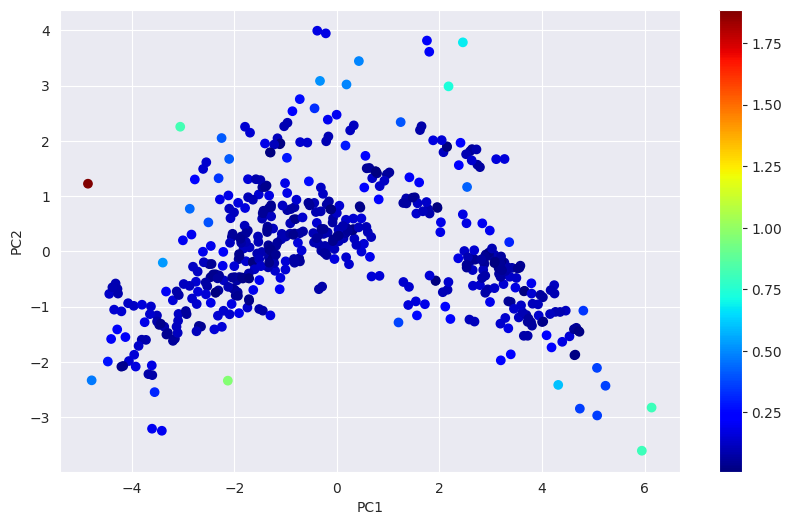

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors 
from scipy.spatial.distance import euclidean 

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

# To run PCA, Normalise the data first
sc=StandardScaler()
X=sc.fit_transform(X)
#
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(X)
print(principalComponents.shape)


# Implementing a k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=euclidean).fit(principalComponents)
distances, indices = nbrs.kneighbors(principalComponents)
# As outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]


# Plotting 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(principalComponents[:,0], principalComponents[:,1], c = outlier_score, cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()

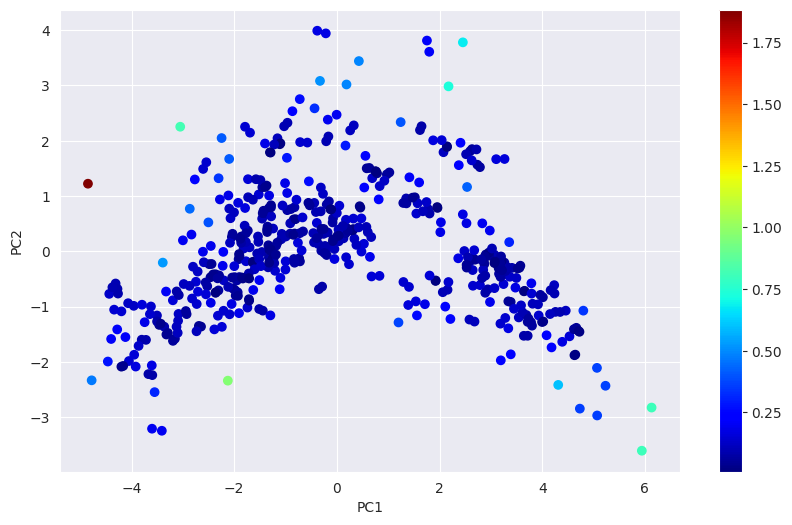

In [22]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
housing_df = pd.read_csv(url, header=None)
# Dropping the output column and performing normalization
df.drop([13], axis=1, inplace=True)
#Calculating Z-score for the data
df_normalized = (df - df.mean()) / df.std()
# Performing PCA
components = 2
pca = PCA(n_components = components)
pca.fit(df_normalized)
df_projected = pca.transform(df_normalized)
df_projected = pd.DataFrame(df_projected, columns=['pc1','pc2'])
# Implementing a k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(df_projected.values)
distances, indices = nbrs.kneighbors(df_projected.values)
# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]
# Plotting 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(df_projected.pc1, df_projected.pc2, c=outlier_score, cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()